# Imports

In [11]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


# Download images

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# There are the training images # These are the test images
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocessing

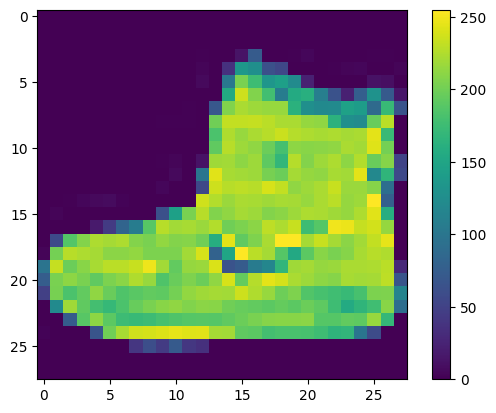

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalize the data from 0 - 1
train_images = train_images/255
test_images = test_images/255


# Show additional images

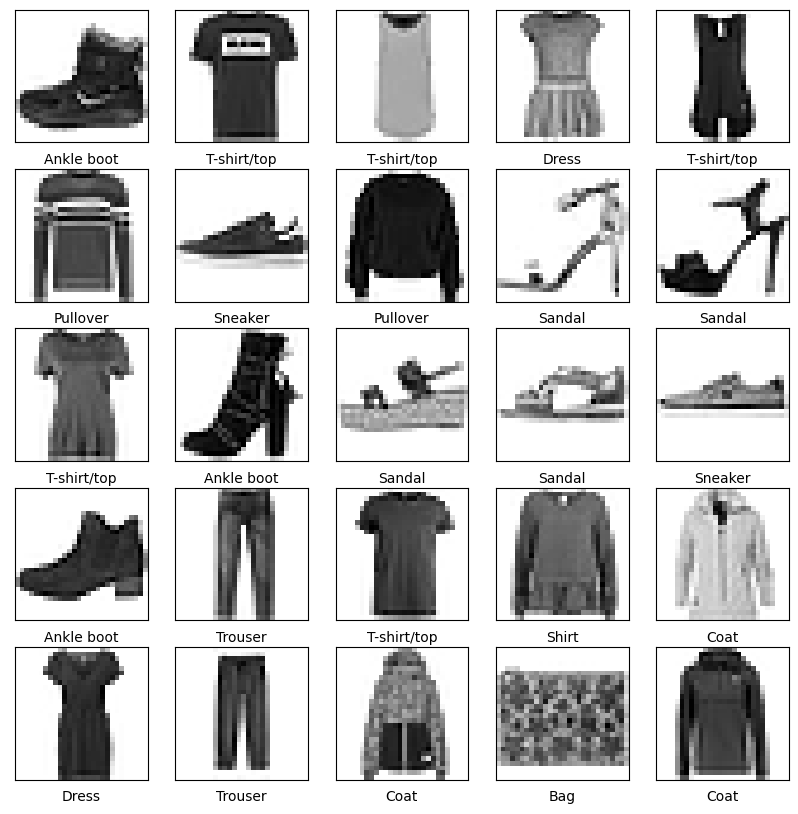

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Setting up the layers

In [19]:
model = tf.keras.Sequential([
    # Unstacks the pixel rows of the images and lines them end to end 28x28 -> 784 pixels
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Densely connected nural net with 128 notes
    tf.keras.layers.Dense(128, activation='relu'),
    # Less dense 
    tf.keras.layers.Dense(10)
])

# Compile stage

In [20]:
model.compile(optimizer='adam', # Determines the way the model is updated
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function, measures model accuracy
              metrics=['accuracy']) # Show metrics data

# Fit and train model

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5002 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3801 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3397 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3139 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2946 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2671 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2588 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2490 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.242

# Evaluate Test Cases

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3323 - accuracy: 0.8821 - 402ms/epoch - 1ms/step

Test accuracy: 0.882099986076355


# Make Predictions

In [33]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print("Prediction: {:d}".format(np.argmax(predictions[0])))
print("Reality: {:d}".format(test_labels[0]))

313/313 [==============================] - 0s 846us/step
Prediction: 9
Reality: 9


# Plotting results

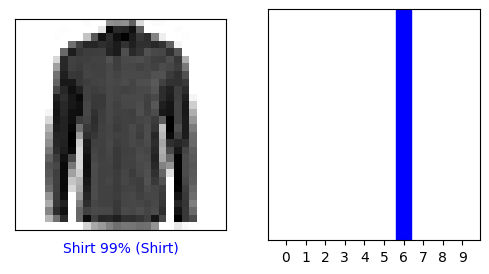

In [51]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 9000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Plot the first X test images, their predicted labels, and the true labels.  
Color correct predictions in blue and incorrect predictions in red.

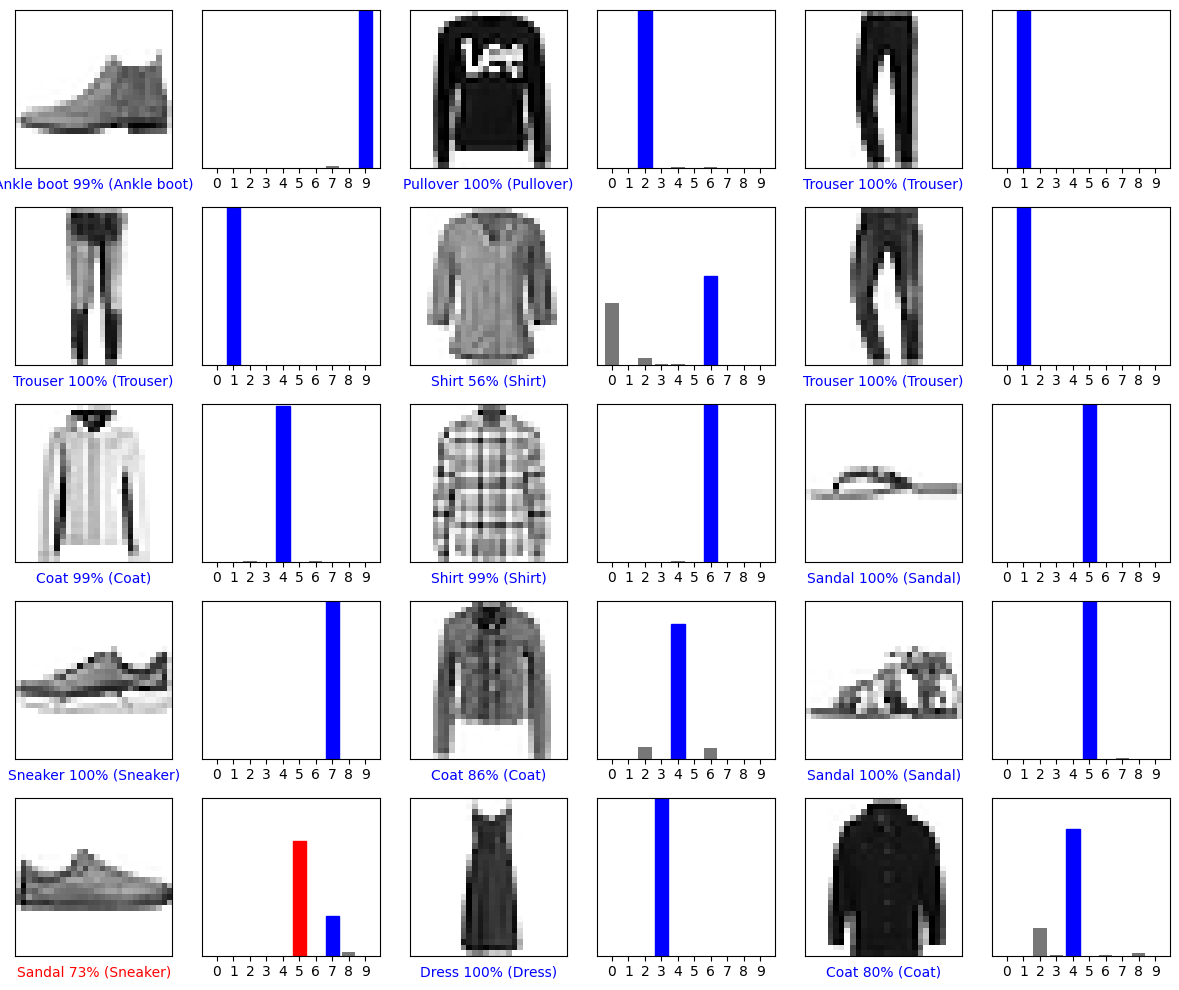

In [52]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Using the trained model

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 22ms/step
[[2.6505168e-05 1.7231004e-10 9.9730659e-01 2.8972178e-08 8.3957607e-04
  3.3208446e-13 1.8273024e-03 1.7699518e-17 1.0328545e-10 2.8447535e-12]]


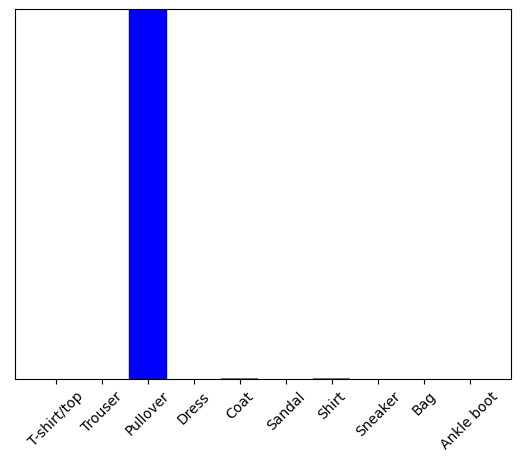

In [56]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

# Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])
plt.show()